In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

print(tf.__version__)

2.4.0


In [4]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Images.zip.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


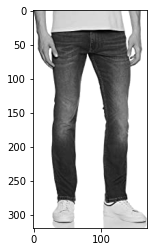

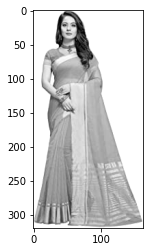

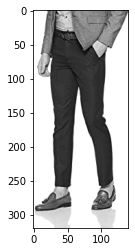

In [18]:
DATADIR = "/content/drive/MyDrive/Image"
CATEGORIES = ['/content/New folder/Jeans Men','/content/New folder/Sarees Women','/content/New folder/Trousers Men']

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break 

In [19]:
print(img_array.shape)


(320, 140)


In [20]:

print(img_array)

[[255 255 255 ... 105  81 179]
 [255 255 255 ...  89  97 217]
 [255 255 255 ...  70 134 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


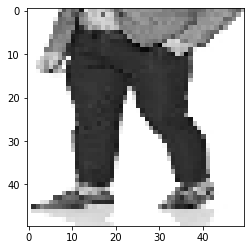

In [21]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [23]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # Sarees, Trousers and Jeans

        path = os.path.join(DATADIR,category)  # create path to sarees, trousers and jeans
        class_num = CATEGORIES.index(category)  # get the classification

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e: 
                pass


create_training_data()

In [24]:
print(len(training_data))

418


In [25]:
import random

random.shuffle(training_data)

In [26]:

for sample in training_data[:10]:
    print(sample[1])

0
1
1
2
1
0
1
2
2
2


In [30]:
X= []
y = []

In [31]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [32]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [33]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [35]:
X[1]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)

In [36]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [38]:
X = X/255.0
X[1]

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

In [39]:

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [40]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [41]:
y = np.array(y)

In [42]:
model.fit(X, y, batch_size=32, epochs=30, validation_split=0.1)

Epoch 1/30
12/12 [==============================] - 8s 38ms/step - loss: -3.6542 - accuracy: 0.2272 - val_loss: -36.6933 - val_accuracy: 0.3333
Epoch 2/30
12/12 [==============================] - 0s 8ms/step - loss: -65.4332 - accuracy: 0.2753 - val_loss: -231.7330 - val_accuracy: 0.3333
Epoch 3/30
12/12 [==============================] - 0s 8ms/step - loss: -497.1029 - accuracy: 0.2960 - val_loss: -1189.3643 - val_accuracy: 0.3333
Epoch 4/30
12/12 [==============================] - 0s 7ms/step - loss: -2363.6492 - accuracy: 0.2441 - val_loss: -4123.0542 - val_accuracy: 0.3333
Epoch 5/30
12/12 [==============================] - 0s 8ms/step - loss: -6140.5211 - accuracy: 0.2677 - val_loss: -9846.3564 - val_accuracy: 0.3333
Epoch 6/30
12/12 [==============================] - 0s 7ms/step - loss: -12990.9654 - accuracy: 0.2942 - val_loss: -21679.3340 - val_accuracy: 0.3333
Epoch 7/30
12/12 [==============================] - 0s 8ms/step - loss: -34611.6163 - accuracy: 0.2896 - val_loss: -43

In [43]:

model.evaluate(X, y, verbose = 2)

14/14 - 0s - loss: -2.7081e+07 - accuracy: 0.2823


[-27080652.0, 0.28229665756225586]